# Центральная предельная теорема своими руками

## Гистограмма выборки

Будем рассмотривать экспоненциальное распределение случайно величины с $\lambda = 1$. Плотность вероятности для экспоненциального распределения будет иметь следующий вид:

$
f_X(x) = \begin{cases}
\lambda \,e^{-\lambda x} ,& x \ge 0, \\
0 ,& x < 0.
\end{cases}.
$

__Пример экспоненциального распределения в жизни:__ Пусть есть магазин, в который время от времени заходят покупатели. При определённых допущениях время между появлениями двух последовательных покупателей будет случайной величиной с экспоненциальным распределением. Среднее время ожидания нового покупателя равно $1/\lambda$. Сам параметр $\lambda$ тогда может быть интерпретирован как среднее число новых покупателей за единицу времени.

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.

In [2]:
# импортируем все необходимые библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [3]:
# сгенеруем выборку объема 1000 из распределения
rv = sts.expon()
sample = rv.rvs(1000)

# расчитаем теоритеческую плотность вероятности (pdf - probability density function) для распределения
x = np.linspace(0,15,1000)
pdf = rv.pdf(x)

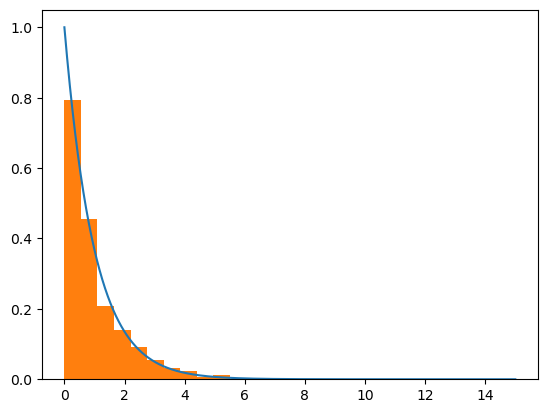

In [17]:
# построим гистограмму выборки и наложим на нее теоретическую
# оценку плотности вероятности экспоненциального распределения

#ваш код, используйте библиотеку plt

plt.plot(x, pdf)
plt.hist(sample, density=True)
plt.show()

## Распределение выборочных средних

Перейдем к следующему шагу и оценим распределение выборочных средних случайной величины. Согласно Центральной Предельной Теореме выборочные средние  $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

В нашем случае экспоненциального распределения: $\mathbb{E}X = \lambda^{-1}\, = 1$ - _математическое ожидание_, $\mathbb{D}X = \lambda^{-2}\, = 1$ - _дисперсия_.

Таким образом, __распределение выборочных средних экспоненциального распределения__ с $\lambda = 1$ будет приближаться нормальным распределением $N(\mu = 1, \sigma^2 = \frac{1}{n})$.

In [24]:
# опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def generate_pdf(n):
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        # выборку генерировали выше, нужно подумать как теперь генерировать выборочные средние
        sample = sts.expon().rvs(n)
        means.append(np.mean(sample))

    means = np.array(means)
    # расчитаем теоритеческую плотность вероятности (pdf - probability density function) для нормального распределения
    mu = 1 # theoretical expectation
    sigma = (1./n) ** 0.5 # theoretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf)
    plt.hist(means, density = True)
    plt.show()

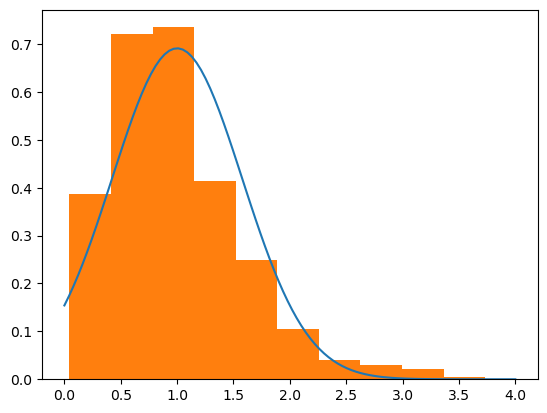

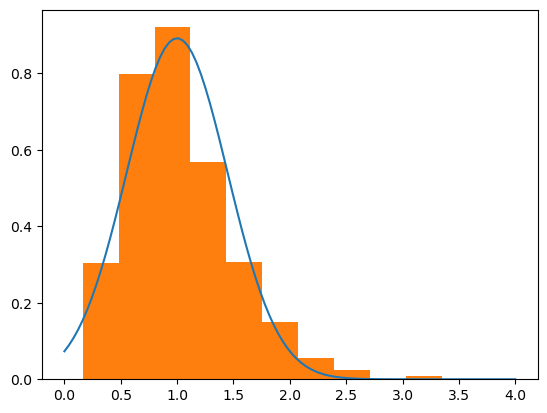

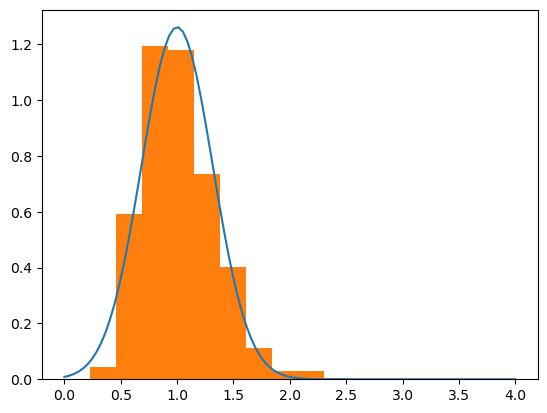

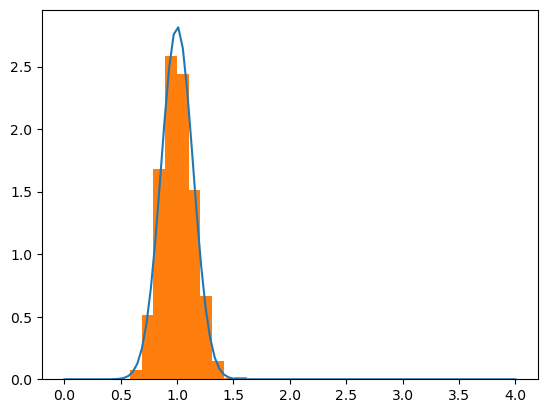

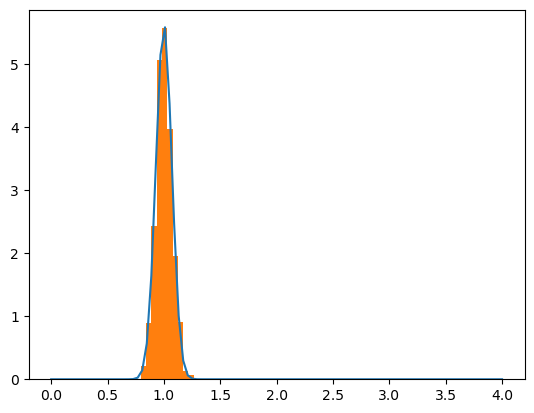

In [25]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений
# при различных объемах выборок n = [3, 5, 10, 50, 200]

n = [3, 5, 10, 50, 200]
for i in range(len(n)):
    generate_pdf(n[i])

__Вывод:__ как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. При n=3 распределение несимметрично и совсем не похоже на нормальное, но уже при n=50 распределение выборочных средних достаточно хорошо соответсвует нормальному. Также стоит отметить, что с ростом n уменьшается дисперсия распределения выборочных средних.